In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tidy_data = pd.read_csv('vitalsing_data.csv')

tidy_data = tidy_data.iloc[0:4000, :]

X_data = tidy_data.drop(['ID','CHT_NO', 'admin_date', 'discharge_date',
                         'AllMortality', 'CVDeath  ', 'Death Date', 'SurvivalWeeks'], axis=1)
y_data = tidy_data[['SurvivalWeeks']]
y_data = (y_data < 24).astype(int)

categorical_ix = [0, 2, 3, 4, 5, 6, 7, 8]
categorical_columns = X_data.columns[categorical_ix].values
numerical_columns =  np.setdiff1d(X_data.columns, categorical_columns)

In [3]:
print(X_data.head())
print(categorical_columns)
print(numerical_columns)

   Sex   Age   AF   DM  HTN  Dyslipidemia  CHF  Smoking  Cancer before adm  \
0  1.0  62.0  0.0  1.0  0.0           0.0  0.0      1.0                0.0   
1  1.0  81.0  1.0  0.0  1.0           1.0  0.0      0.0                1.0   
2  0.0  80.0  0.0  1.0  0.0           1.0  0.0      0.0                0.0   
3  1.0  18.0  0.0  0.0  0.0           0.0  0.0      0.0                0.0   
4  1.0  82.0  0.0  1.0  1.0           0.0  0.0      1.0                0.0   

     E  ...  DBP SD  DBPSD G  DBP CV  DBPCV G  Mean RR  MeanRR G  RR SD  \
0  4.0  ...     7.1      2.0    0.09      3.0     16.3       2.0    1.3   
1  4.0  ...     8.4      3.0    0.10      3.0     16.5       2.0    2.4   
2  4.0  ...     7.4      2.0    0.07      2.0     17.5       3.0    1.3   
3  4.0  ...     5.4      2.0    0.08      2.0     16.8       2.0    0.9   
4  4.0  ...     7.3      2.0    0.10      3.0     18.3       4.0    0.6   

   RRSD G  RR CV  RRCV G  
0     2.0   0.08     2.0  
1     3.0   0.15     4.0  

In [4]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

X_data[numerical_columns] = StandardScaler().fit_transform(X_data[numerical_columns])
# one-hot
X_data_one_hot = pd.get_dummies(X_data, columns=categorical_columns)
print(X_data.head())

   Sex       Age   AF   DM  HTN  Dyslipidemia  CHF  Smoking  \
0  1.0  0.178494  0.0  1.0  0.0           0.0  0.0      1.0   
1  1.0  1.474652  1.0  0.0  1.0           1.0  0.0      0.0   
2  0.0  1.406433  0.0  1.0  0.0           1.0  0.0      0.0   
3  1.0 -2.823133  0.0  0.0  0.0           0.0  0.0      0.0   
4  1.0  1.542871  0.0  1.0  1.0           0.0  0.0      1.0   

   Cancer before adm         E  ...    DBP SD   DBPSD G    DBP CV   DBPCV G  \
0                0.0  0.200928  ... -0.807344 -1.122072 -0.528708 -0.217747   
1                1.0  0.200928  ... -0.337054  0.222532 -0.240702 -0.217747   
2                0.0  0.200928  ... -0.698816 -1.122072 -1.104721 -1.382167   
3                0.0  0.200928  ... -1.422340 -1.122072 -0.816715 -1.382167   
4                0.0  0.200928  ... -0.734992 -1.122072 -0.240702 -0.217747   

    Mean RR  MeanRR G     RR SD    RRSD G     RR CV    RRCV G  
0 -1.019867 -1.007532 -0.182784  0.107558 -0.030190 -0.565277  
1 -0.852775 -1.007

C:\Users\USER\anaconda3\envs\reStroke\lib\site-packages\umap\__init__.py:9: UserWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn("Tensorflow not installed; ParametricUMAP will be unavailable")
C:\Users\USER\anaconda3\envs\reStroke\lib\site-packages\umap\umap_.py:1728: UserWarning: custom distance metric does not return gradient; inverse_transform will be unavailable. To enable using inverse_transform method method, define a distance function that returns a tuple of (distance [float], gradient [np.array])
  warn(


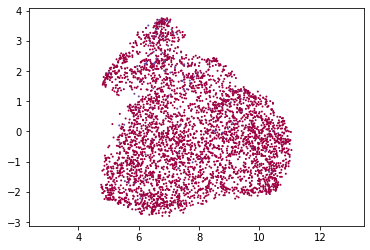

In [5]:
import distython
import umap

heom_metric = distython.HEOM(X_data, categorical_ix)
reducer = umap.UMAP(metric=heom_metric.heom, random_state=369)
umap_heom_embedding = reducer.fit_transform(X_data)

plt.scatter(
    umap_heom_embedding[:, 0],
    umap_heom_embedding[:, 1],
    c=y_data.values.astype(int), s=1, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')

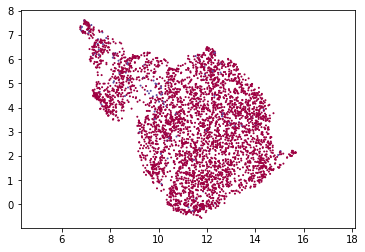

In [6]:
reducer = umap.UMAP(random_state=369)
umap_embedding = reducer.fit_transform(X_data_one_hot)
plt.scatter(
    umap_embedding[:, 0],
    umap_embedding[:, 1],
    c=y_data.values.astype(int), s=1, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')